In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars=pd.read_csv(r"Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.duplicated()


0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

<Axes: xlabel='MPG', ylabel='Density'>

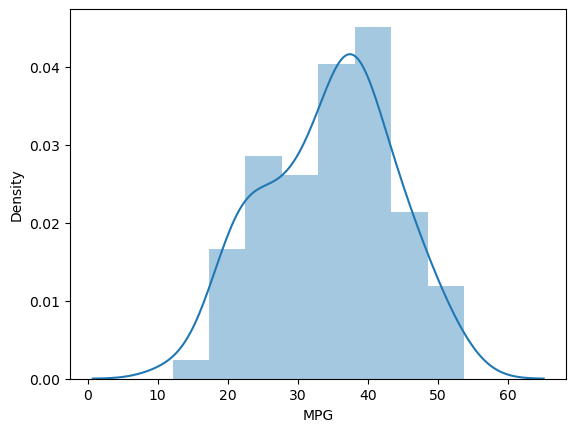

In [5]:
sns.distplot(cars['MPG'])

<Axes: xlabel='WT', ylabel='Density'>

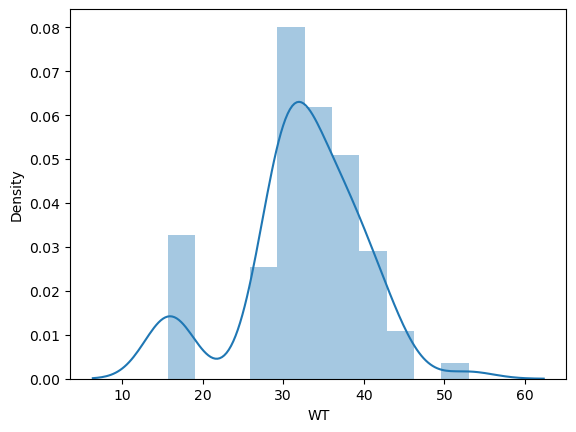

In [6]:
sns.distplot(cars['WT'])

<Axes: xlabel='HP', ylabel='Density'>

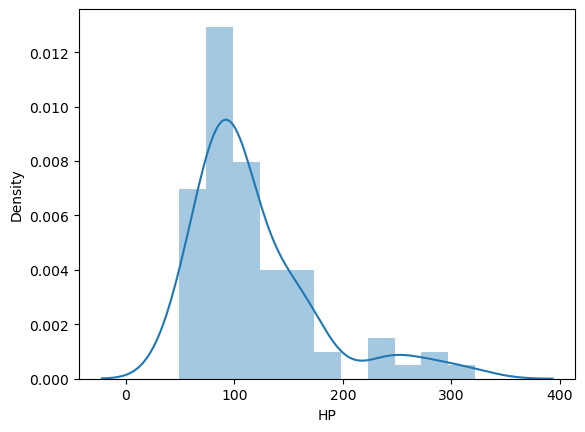

In [7]:
sns.distplot(cars['HP'])

In [8]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

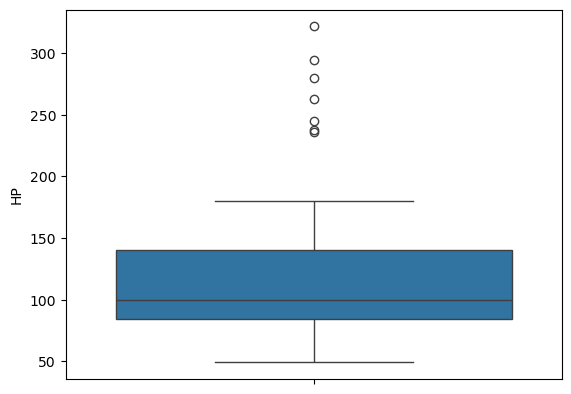

In [9]:
sns.boxplot(cars['HP'])
plt.show()

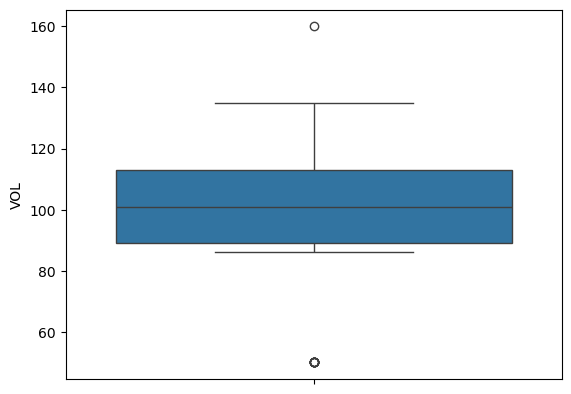

In [10]:
sns.boxplot(cars['VOL'])
plt.show()

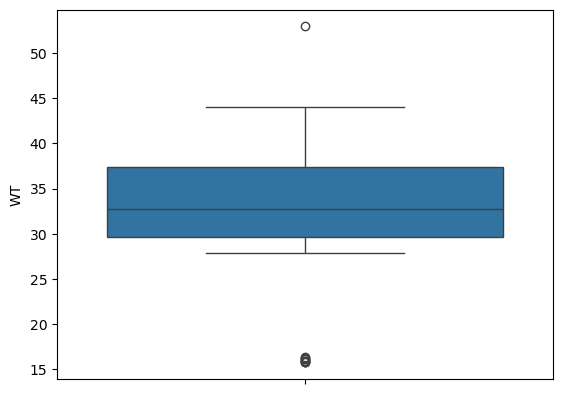

In [15]:
sns.boxplot(cars['WT'])
plt.show()

<Axes: ylabel='MPG'>

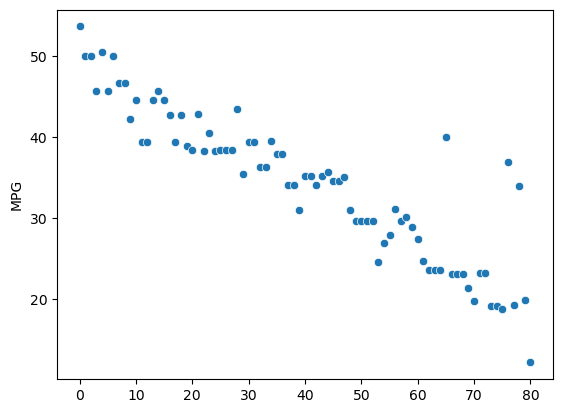

In [20]:
sns.scatterplot(cars['MPG'])

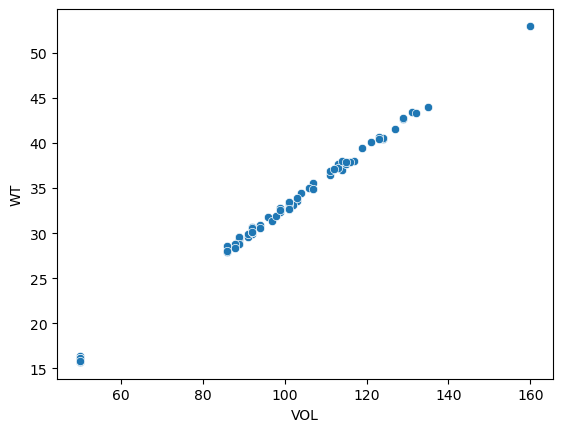

In [25]:
sns.scatterplot(x=cars['VOL'],y=cars['WT'],palette=['red','green'])
plt.show()

<Axes: xlabel='VOL', ylabel='WT'>

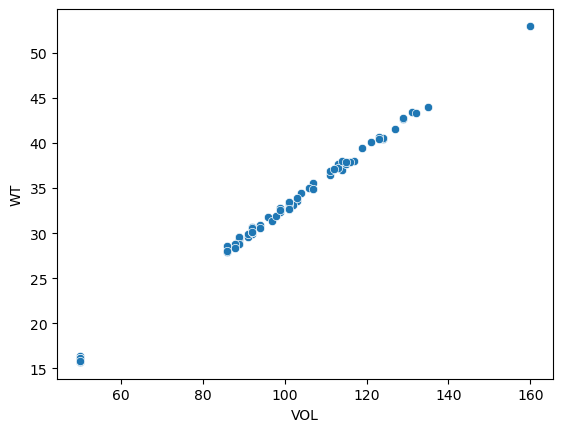

In [27]:
sns.scatterplot(x=cars['VOL'],y=cars['WT'])

<Axes: xlabel='WT', ylabel='MPG'>

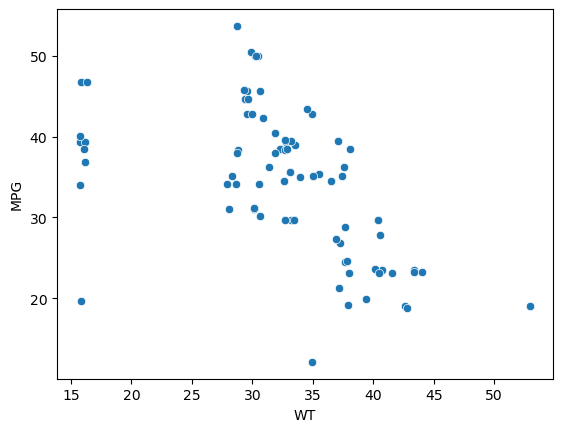

In [29]:
sns.scatterplot(x=cars['WT'],y=cars['MPG'])

Correlation Matrix

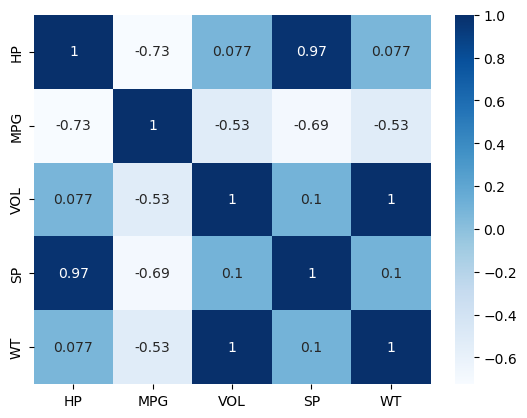

In [32]:
sns.heatmap(cars.corr(),cmap='Blues',annot=True)
plt.show()

In [37]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cars[['HP','WT','VOL','SP']]=sc.fit_transform(cars[['HP','WT','VOL','SP']])

In [41]:
np.round(cars.describe(),3)

,HP,MPG,VOL,SP,WT
count,81.000,81.000,81.000,81.000,81.000
mean,-0.000,34.422,0.000,0.000,0.000
std,1.006,9.131,1.006,1.006,1.006
min,-1.206,12.101,-2.200,-1.559,-2.243
25%,-0.590,27.856,-0.441,-0.547,-0.379
50%,-0.308,35.153,0.101,-0.236,0.043
75%,0.397,39.532,0.642,0.345,0.669
max,3.603,53.701,2.763,3.410,2.764


In [49]:
import statsmodels.formula.api as smf
ml_vol=smf.ols('MPG~VOL',data=cars).fit()
np.round(ml_vol.rsquared,2 #rsquared means it is independent variable of 'vol'

0.28

In [52]:
ml_vol.params

Intercept    34.422076
VOL          -4.801137
dtype: float64

In [58]:
import statsmodels.formula.api as smf
ml_hp=smf.ols('MPG~HP',data=cars).fit()
np.round(ml_hp.rsquared,2)

0.53

In [64]:
import statsmodels.formula.api as smf
ml_sp=smf.ols('MPG~SP',data=cars).fit()
np.round(ml_sp.rsquared,2)

0.47

In [66]:
import statsmodels.formula.api as smf
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [68]:
np.round(model.rsquared,2)

0.77

In [70]:
# y=mx+c is formula for simple linear regression and line